## translation for mma

In [1]:
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
import math
from math import sqrt 
from math import pi
from math import e
from scipy.optimize import root

import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

In [4]:
eq1=A0/(sqrt(2)*sigma0)    \
-(math.exp(-((mu0 - mu[0])**2 / (2 * (sigma0**2 + sigma[0]**2)))) * A[0]) / math.sqrt(sigma0**2 + sigma[0]**2) \
- (math.exp(-((mu0 - mu[1])**2 / (2 * (sigma0**2 + sigma[1]**2)))) * A[1]) / math.sqrt(sigma0**2 + sigma[1]**2) \
- (math.exp(-((mu0 - mu[2])**2 / (2 * (sigma0**2 + sigma[2]**2)))) * A[2]) / math.sqrt(sigma0**2 + sigma[2]**2)

In [5]:
eq2=\
 ((math.exp((2 * mu0 * sigma0**2 * mu[0] - sigma0**2 * mu[0]**2 + mu0**2 * sigma[0]**2) / (2 * sigma0**4 + 2 * sigma0**2 * sigma[0]**2))
   * sigma0**2 * A[0] * (mu0 - mu[0]))    
  / (sigma0**2 + sigma[0]**2)**(3/2)      
    +                                     
 (math.exp((2 * mu0 * sigma0**2 * mu[1] - sigma0**2 * mu[1]**2 + mu0**2 * sigma[1]**2) / (2 * sigma0**4 + 2 * sigma0**2 * sigma[1]**2))
   * sigma0**2 * A[1] * (mu0 - mu[1]))    
  / (sigma0**2 + sigma[1]**2)**(3/2)       
  +                                        
 (math.exp((2 * mu0 * sigma0**2 * mu[2] - sigma0**2 * mu[2]**2 + mu0**2 * sigma[2]**2) / (2 * sigma0**4 + 2 * sigma0**2 * sigma[2]**2))
   * sigma0**2 * A[2] * (mu0 - mu[2]))    
  / (sigma0**2 + sigma[2]**2)**(3/2))
 

In [6]:
term1 = -A0 * sigma0

term2 = 2 * np.sqrt(2) * sigma0**4 * (                                                   
      np.exp(-(mu0 - mu[0])**2 / (2 * (sigma0**2 + sigma[0]**2))) * A[0] *                        
        (-mu0**2 + sigma0**2 + 2 * mu0 * mu[0] - mu[0]**2 + sigma[0]**2) /                
            (sigma0**2 + sigma[0]**2)**(5/2)                                           
    + np.exp(-(mu0 - mu[1])**2 / (2 * (sigma0**2 + sigma[1]**2))) * A[1] *              
        (-mu0**2 + sigma0**2 + 2 * mu0 * mu[1] - mu[1]**2 + sigma[1]**2) /              
            (sigma0**2 + sigma[1]**2)**(5/2)                                            
    + np.exp(-(mu0 - mu[2])**2 / (2 * (sigma0**2 + sigma[2]**2))) * A[2] *                
        (-mu0**2 + sigma0**2 + 2 * mu0 * mu[2] - mu[2]**2 + sigma[2]**2) /                 
            (sigma0**2 + sigma[2]**2)**(5/2)                                              
)
eq3=term1+term2

In [7]:
A=[1,2,3]
mu=[3,2,1]
sigma=[1,2,1]
A0=2
mu0=3
sigma0=3

In [8]:
def equations(p,):
    A0, mu0 ,sigma0= p
    
    A=[1.,2.,0]
    mu=[3.,2.,1]
    sigma=[1.,2.,2]

    eq1=A0/(sqrt(2)*sigma0)    \
    -(math.exp(-((mu0 - mu[0])**2 / (2 * (sigma0**2 + sigma[0]**2)))) * A[0]) / math.sqrt(sigma0**2 + sigma[0]**2) \
    - (math.exp(-((mu0 - mu[1])**2 / (2 * (sigma0**2 + sigma[1]**2)))) * A[1]) / math.sqrt(sigma0**2 + sigma[1]**2) \
    - (math.exp(-((mu0 - mu[2])**2 / (2 * (sigma0**2 + sigma[2]**2)))) * A[2]) / math.sqrt(sigma0**2 + sigma[2]**2)
    
    eq2=\
         ((math.exp((2 * mu0 * sigma0**2 * mu[0] - sigma0**2 * mu[0]**2 + mu0**2 * sigma[0]**2) / (2 * sigma0**4 + 2 * sigma0**2 * sigma[0]**2))
       * sigma0**2 * A[0] * (mu0 - mu[0]))    
      / (sigma0**2 + sigma[0]**2)**(3/2)      
        +                                     
     (math.exp((2 * mu0 * sigma0**2 * mu[1] - sigma0**2 * mu[1]**2 + mu0**2 * sigma[1]**2) / (2 * sigma0**4 + 2 * sigma0**2 * sigma[1]**2))
       * sigma0**2 * A[1] * (mu0 - mu[1]))    
      / (sigma0**2 + sigma[1]**2)**(3/2)       
      +                                        
     (math.exp((2 * mu0 * sigma0**2 * mu[2] - sigma0**2 * mu[2]**2 + mu0**2 * sigma[2]**2) / (2 * sigma0**4 + 2 * sigma0**2 * sigma[2]**2))
       * sigma0**2 * A[2] * (mu0 - mu[2]))    
      / (sigma0**2 + sigma[2]**2)**(3/2))
    
    term1 = -A0 * sigma0

    term2 = 2 * np.sqrt(2) * sigma0**4 * (                                                   
          np.exp(-(mu0 - mu[0])**2 / (2 * (sigma0**2 + sigma[0]**2))) * A[0] *                        
            (-mu0**2 + sigma0**2 + 2 * mu0 * mu[0] - mu[0]**2 + sigma[0]**2) /                
                (sigma0**2 + sigma[0]**2)**(5/2)                                           
        + np.exp(-(mu0 - mu[1])**2 / (2 * (sigma0**2 + sigma[1]**2))) * A[1] *              
            (-mu0**2 + sigma0**2 + 2 * mu0 * mu[1] - mu[1]**2 + sigma[1]**2) /              
                (sigma0**2 + sigma[1]**2)**(5/2)                                            
        + np.exp(-(mu0 - mu[2])**2 / (2 * (sigma0**2 + sigma[2]**2))) * A[2] *                
            (-mu0**2 + sigma0**2 + 2 * mu0 * mu[2] - mu[2]**2 + sigma[2]**2) /                 
                (sigma0**2 + sigma[2]**2)**(5/2)                                              
        )
    
    eq3=term1+term2
    
    
    print(eq1,eq2,eq3)
    return [eq1, eq2, eq3]

In [9]:
sol=fsolve(equations,x0=(2.73541282,2.34814,1.8034931))
# sol=fsolve(equations,x0=(3,3,1))

-0.12527091575039406 -0.2684192428679446 0.9759641202587375
-0.12527091575039406 -0.2684192428679446 0.9759641202587375
-0.12527091575039406 -0.2684192428679446 0.9759641202587375
-0.1252708997690425 -0.2684192428679446 0.9759640467468671
-0.1252709169875441 -0.2684191971905411 0.9759641555205922
-0.12527092216025826 -0.2684192316950688 0.9759642509086994
0.022285850306307364 0.13030556136796545 -0.004098197129720482
-0.0031665514737930778 -0.06673034208912731 0.04535498259799109
0.001015957806815182 0.007743750462332111 0.003045771992931101
7.259760747169164e-05 -3.394022087643833e-05 0.00034031813166901514
-1.63722450119419e-06 8.73919319516192e-05 -6.985894206490428e-05
-4.748896975659278e-08 -5.087375576362518e-07 -7.082321804574576e-07
-2.8934079576714566e-09 1.1695509516407299e-07 -1.0001919736879472e-07
5.627471821867402e-10 -2.2566481683305994e-08 1.9374779114400553e-08
9.459100169806334e-14 -3.923861235932691e-12 3.3102409702223667e-12


In [10]:
A0,mu0,sigma0=sol
sol

array([2.90684149, 2.55208653, 1.61610393])

<Gaussian1D(amplitude=2.73541298, mean=2.34814504, stddev=1.8034929)>

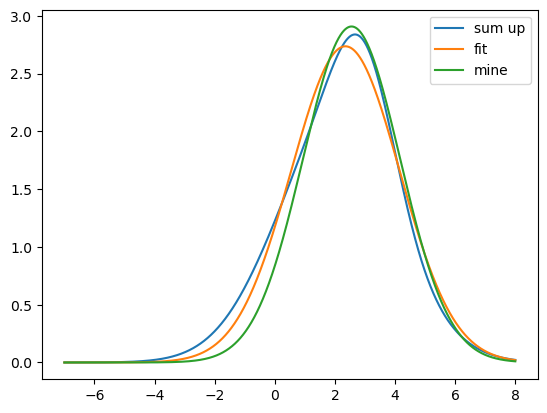

In [17]:
num=3
c=[]
    
A=[1,2,0]
mu=[3,2,1]
sigma=[1,2,2]
wave_list=np.linspace(-7,8,200000)
for i in range(num):
    c.append(models.Gaussian1D(amplitude=A[i], mean=mu[i], stddev=sigma[i]))
    
total=np.zeros_like(c[0](wave_list))

# for i in range(num):
#     total+=c[i](wave_list)

total=c[0](wave_list)+c[1](wave_list)+c[2](wave_list)
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()
    
# for i in range(num):
#     ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")
ax.plot(wave_list,models.Gaussian1D(amplitude=A0, mean=mu0, stddev=sigma0)(wave_list),label="mine")

ax.legend()
c_fitted

In [131]:
((c_fitted(wave_list)-total)**2).sum()

592.1782444551067

In [12]:
((models.Gaussian1D(amplitude=A0, mean=mu0, stddev=sigma0)(wave_list)-total)**2).sum()
# 有限区间上 我的误差更大
#但是根据 mma，无限区间上，我的误差最小

1665.6426156655018

<img src="./infinite_approximation.assets/image-20230324004622787.png" alt="image-20230324004622787" style="zoom:67%;" />

<img src="./infinite_approximation.assets/image-20230324004211651.png" alt="image-20230324004211651" style="zoom:55%;" />